In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import colors

### Gaussian Noise

(-0.5, 297.5, 249.5, -0.5)

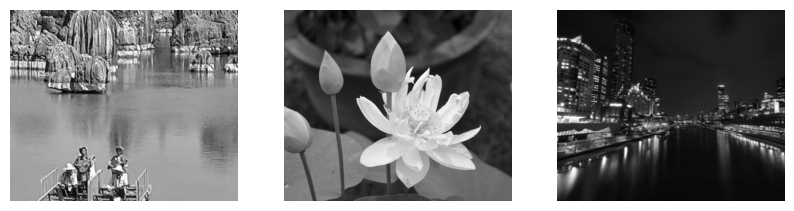

In [3]:
img2 = cv2.imread('Picture2.jpg')
img3 = cv2.imread('Picture3.jpg')
img5 = cv2.imread('Picture5.jpg')

img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img2_greyscale = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3_greyscale = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img5_greyscale = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(img2_greyscale, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img3_greyscale, cmap='gray')
axes[1].axis('off')

axes[2].imshow(img5_greyscale, cmap='gray')
axes[2].axis('off')

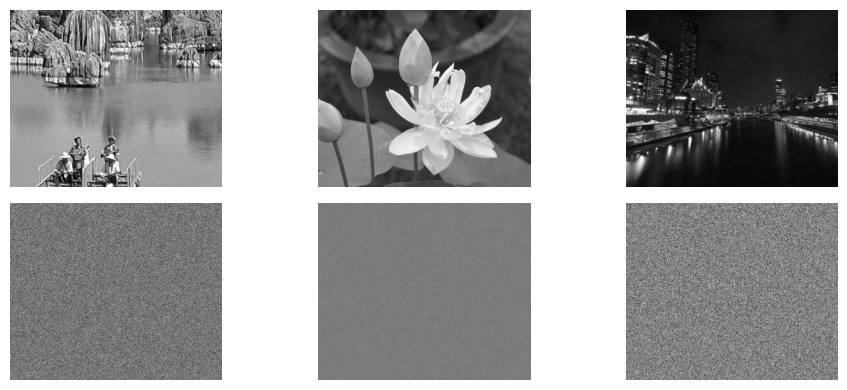

In [34]:
def add_gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    gauss = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + gauss
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image, gauss 

img2_noisy, gauss1 = add_gaussian_noise(img2_greyscale, sigma=5)
img3_noisy, gauss2 = add_gaussian_noise(img3_greyscale, sigma=5)
img5_noisy, gauss3 = add_gaussian_noise(img5_greyscale, sigma=5)

fig, axes = plt.subplots(2, 3, figsize=(10, 4))

# Top row: noisy images
axes[0, 0].imshow(img2_noisy, cmap='gray')
axes[0, 0].axis('off')

axes[0, 1].imshow(img3_noisy, cmap='gray')
axes[0, 1].axis('off')

axes[0, 2].imshow(img5_noisy, cmap='gray')
axes[0, 2].axis('off')

# Bottom row: Gaussian noise arrays
axes[1, 0].imshow(gauss1, cmap='gray')
axes[1, 0].axis('off')

axes[1, 1].imshow(gauss2, cmap='gray')
axes[1, 1].axis('off')

axes[1, 2].imshow(gauss3, cmap='gray')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Impulse Noise

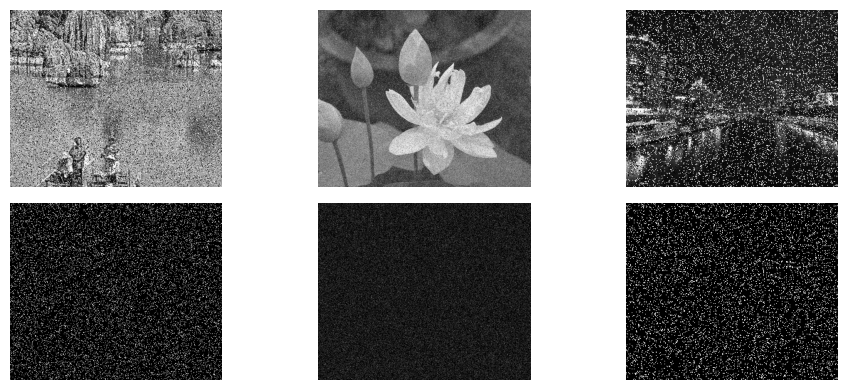

In [21]:
def impulse_noise(image, prob=0.05):
    """Add impulse noise to an image."""
    noisy_image = np.copy(image)
    rand = np.random.rand(*image.shape)
    noise_mask = np.zeros_like(image, dtype=np.uint8)
    noisy_image[rand < prob] = 0
    noise_mask[rand < prob] = 0

    noisy_image[rand > 1 - prob] = 255
    noise_mask[rand > 1 - prob] = 255
    return noisy_image, noise_mask

img2_impulse, mask1 = impulse_noise(img2_greyscale, prob=0.1)
img3_impulse, mask2 = impulse_noise(img3_greyscale, prob=0.1)
img5_impulse, mask3 = impulse_noise(img5_greyscale, prob=0.1)

fig, axes = plt.subplots(2, 3, figsize=(10, 4))

# Top row: noisy images
axes[0, 0].imshow(img2_impulse, cmap='gray')
axes[0, 0].axis('off')

axes[0, 1].imshow(img3_impulse, cmap='gray')
axes[0, 1].axis('off')

axes[0, 2].imshow(img5_impulse, cmap='gray')
axes[0, 2].axis('off')

# Bottom row: impulse noise masks
axes[1, 0].imshow(mask1, cmap='gray')
axes[1, 0].axis('off')

axes[1, 1].imshow(mask2, cmap='gray')
axes[1, 1].axis('off')

axes[1, 2].imshow(mask3, cmap='gray')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Poisson Noise

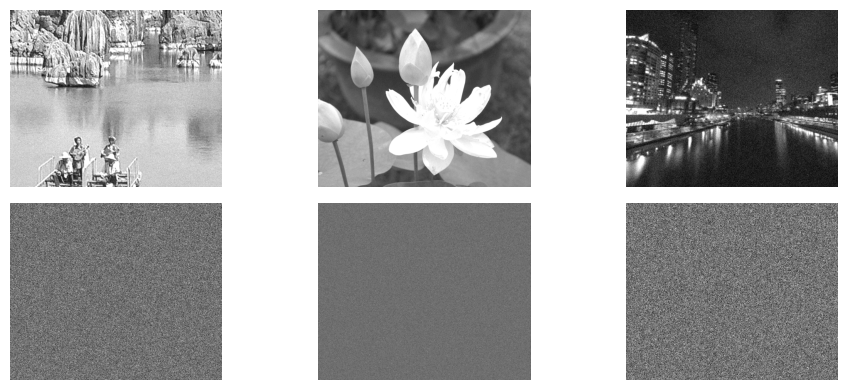

In [18]:
def poisson_noise(image, lam=4):
    poisson = np.random.poisson(lam, size=image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + poisson
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image, poisson

img2_poisson, poisson1 = poisson_noise(img2_greyscale, 50)
img3_poisson, poisson2 = poisson_noise(img3_greyscale, 50)
img5_poisson, poisson3 = poisson_noise(img5_greyscale, 50)

fig, axes = plt.subplots(2, 3, figsize=(10, 4))

# Top row: noisy images
axes[0, 0].imshow(img2_poisson, cmap='gray')
axes[0, 0].axis('off')

axes[0, 1].imshow(img3_poisson, cmap='gray')
axes[0, 1].axis('off')

axes[0, 2].imshow(img5_poisson, cmap='gray')
axes[0, 2].axis('off')

# Bottom row: Poisson noise maps
axes[1, 0].imshow(poisson1, cmap='gray')
axes[1, 0].axis('off')

axes[1, 1].imshow(poisson2, cmap='gray')
axes[1, 1].axis('off')

axes[1, 2].imshow(poisson3, cmap='gray')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

#Variance and mean are the same

### Uniform Noise

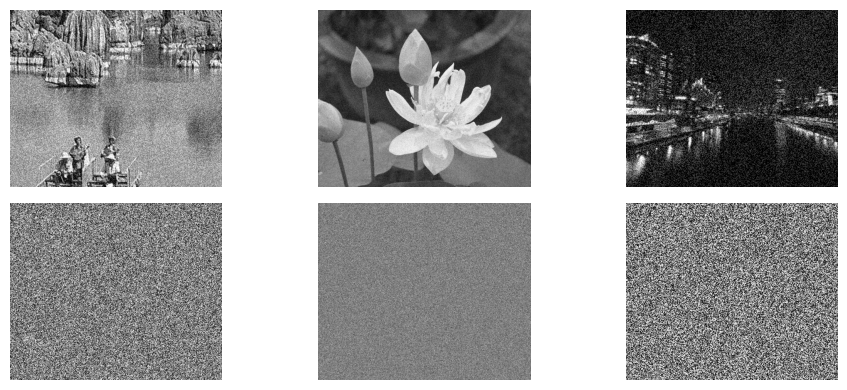

In [16]:
def uniform_noise(image, mean=0, var=25):
    a = mean - np.sqrt(3 * var)
    b = mean + np.sqrt(3 * var)

    uniform = np.random.uniform(a, b, size=image.shape).astype(np.float32)

    noisy_image = image.astype(np.float32) + uniform
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image, uniform

img2_uniform, uniform1 = uniform_noise(img2_greyscale,var=1000)
img3_uniform, uniform2 = uniform_noise(img3_greyscale,var=1000)
img5_uniform, uniform3 = uniform_noise(img5_greyscale,var=1000)

fig, axes = plt.subplots(2, 3, figsize=(10, 4))

# Top row: noisy images
axes[0, 0].imshow(img2_uniform, cmap='gray')
axes[0, 0].axis('off')

axes[0, 1].imshow(img3_uniform, cmap='gray')
axes[0, 1].axis('off')

axes[0, 2].imshow(img5_uniform, cmap='gray')
axes[0, 2].axis('off')

# Bottom row: uniform noise maps
axes[1, 0].imshow(uniform1, cmap='gray')
axes[1, 0].axis('off')

axes[1, 1].imshow(uniform2, cmap='gray')
axes[1, 1].axis('off')

axes[1, 2].imshow(uniform3, cmap='gray')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


### Rayleigh Noise

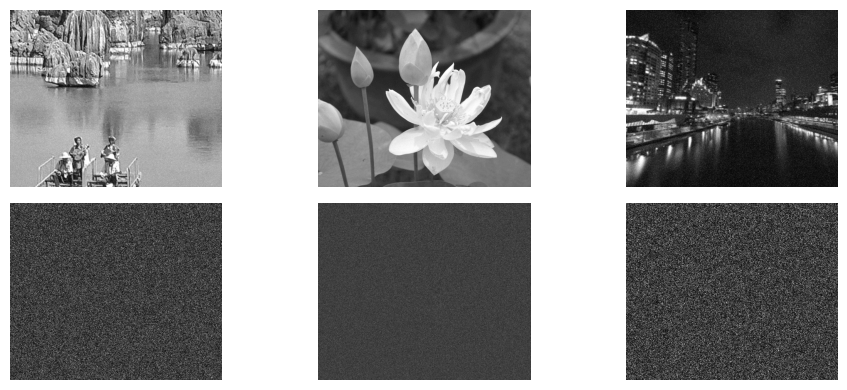

In [8]:
def rayleigh_noise(image, var=1):
    sigma = math.sqrt(var)
    rayleigh= np.random.rayleigh(sigma, size=image.shape).astype(np.float32)
    noisy_image = image.astype(np.float32) + rayleigh
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    mean = sigma * math.sqrt(math.pi / 2)
    return noisy_image, rayleigh

img2_rayleigh, rayleigh1=rayleigh_noise(img2_greyscale,100)
img3_rayleigh, rayleigh2=rayleigh_noise(img3_greyscale,100)
img5_rayleigh, rayleigh3=rayleigh_noise(img5_greyscale,100)

fig, axes = plt.subplots(2, 3, figsize=(10, 4))
axes[0, 0].imshow(img2_rayleigh, cmap='gray')
axes[0, 0].axis('off')

axes[0, 1].imshow(img3_rayleigh, cmap='gray')
axes[0, 1].axis('off')

axes[0, 2].imshow(img5_rayleigh, cmap='gray')
axes[0, 2].axis('off')

# Bottom row: Rayleigh noise maps
axes[1, 0].imshow(rayleigh1, cmap='gray')
axes[1, 0].axis('off')

axes[1, 1].imshow(rayleigh2, cmap='gray')
axes[1, 1].axis('off')

axes[1, 2].imshow(rayleigh3, cmap='gray')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## Paramater estimation

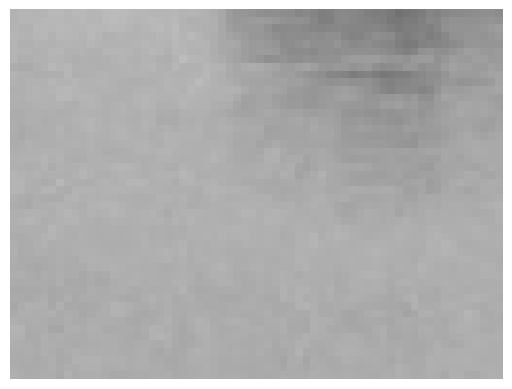

In [35]:
img = cv2.imread('noise.png')


plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

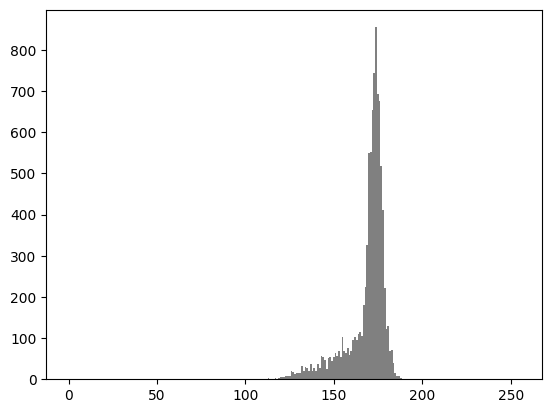

In [36]:
plt.hist(img.ravel(), bins=256, range=(0, 255), color='gray')
plt.show()

Type: Rayleigh or Gaussian

In [38]:
from scipy.stats import norm

# Flatten to 1D
pixels = img.ravel()

# Fit normal distribution
mu, sigma = norm.fit(pixels)

print("Original mean (μ):", mu)
print("Variance (σ**2):", sigma)

Original mean (μ): 168.77604166666666
Variance (σ**2): 11.434595439859859


### Mean filter

(-0.5, 397.5, 333.5, -0.5)

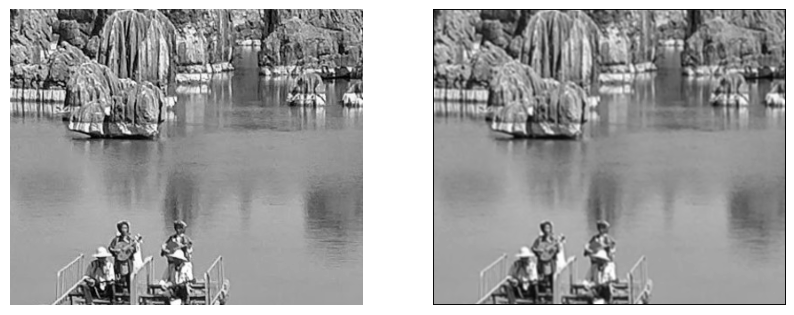

In [12]:
def mean_filter(image):
    h, w = image.shape
    mask = np.ones((3, 3), dtype=float) / 9
    img_new = np.zeros((h, w), dtype=float)
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            new_pixel = (
                image[i-1, j-1]*mask[0,0] + image[i-1, j]*mask[0,1] + image[i-1, j+1]*mask[0,2] +
                image[i, j-1]*mask[1,0]   + image[i, j]*mask[1,1]   + image[i, j+1]*mask[1,2] +
                image[i+1, j-1]*mask[2,0] + image[i+1, j]*mask[2,1] + image[i+1, j+1]*mask[2,2]
            )
            img_new[i, j] = new_pixel
    
    return img_new

# Apply mean filter
img_mean = mean_filter(img2_greyscale)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img2_greyscale, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img_mean, cmap='gray')
axes[1].axis('off')

### Weighted

(-0.5, 397.5, 333.5, -0.5)

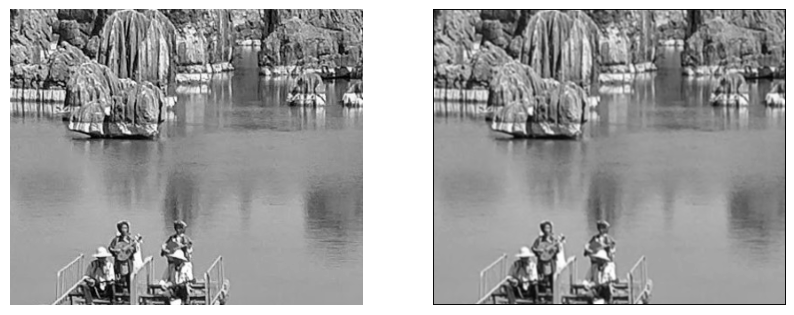

In [13]:
def weighted_filter(image):
    h, w = image.shape
    mask = np.array([[1, 2, 1],
                     [2, 4, 2],
                     [1, 2, 1]], dtype=float)
    mask = mask / mask.sum()
    img_new = np.zeros((h, w), dtype=float)
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            new_pixel = (
                image[i-1, j-1]*mask[0,0] + image[i-1, j]*mask[0,1] + image[i-1, j+1]*mask[0,2] +
                image[i, j-1]*mask[1,0]   + image[i, j]*mask[1,1]   + image[i, j+1]*mask[1,2] +
                image[i+1, j-1]*mask[2,0] + image[i+1, j]*mask[2,1] + image[i+1, j+1]*mask[2,2]
            )
            img_new[i, j] = new_pixel
    
    return img_new

# Apply mean filter
img_weight = weighted_filter(img2_greyscale)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img2_greyscale, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img_weight, cmap='gray')
axes[1].axis('off')

### Geometric Filter

(-0.5, 397.5, 333.5, -0.5)

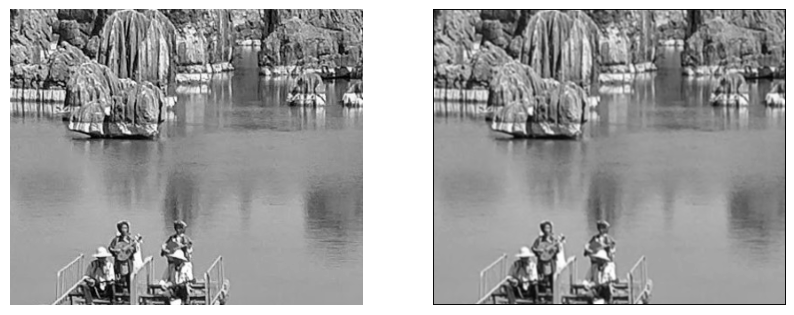

In [ ]:

def geometric_filter_corrected(image):
    h, w = image.shape
    img_new = np.zeros((h, w), dtype=float)
    
    for i in range(1, h-1):
        for j in range(1, w-1):
            # 3x3 neighborhood
            neighborhood = image[i-1:i+2, j-1:j+2]
            
            # Compute the product of all 9 pixels
            product = 1.0
            for pixel_value in neighborhood.flatten():
                # Handle zero values
                if pixel_value > 0:
                    product *= pixel_value
            
            # If any pixel in the neighborhood is 0
            if 0 in neighborhood:
                new_pixel = 0
            else:
                # 9th root
                new_pixel = math.pow(product, 1/9)
            
            img_new[i, j] = new_pixel
    
    return img_new

img_geometric = weighted_filter(img2_greyscale)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img2_greyscale, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img_geometric, cmap='gray')
axes[1].axis('off')

## Adaptive Filter

C:\Users\justi\AppData\Local\Temp\ipykernel_37264\274119883.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  new_pixel=local_mean+((local_variance-noise_variance)/local_variance)*(image[i,j]-local_mean)
C:\Users\justi\AppData\Local\Temp\ipykernel_37264\274119883.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  new_pixel=local_mean+((local_variance-noise_variance)/local_variance)*(image[i,j]-local_mean)
C:\Users\justi\AppData\Local\Temp\ipykernel_37264\274119883.py:19: RuntimeWarning: invalid value encountered in cast
  restored = np.clip(restored, 0, 255).astype(np.uint8)


(-0.5, 957.5, 1105.5, -0.5)

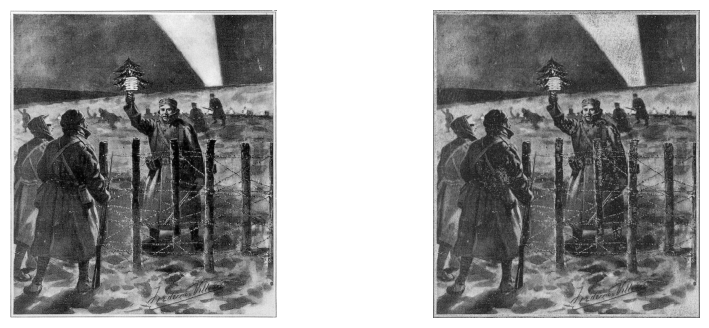

In [50]:
def adapt_filter(image,region):
    h, w = image.shape
    restored = np.zeros((h, w), dtype=float)

    pixels = region.ravel()
    hist, bin_edges = np.histogram(pixels, bins=256, range=(0, 255), density=True)
    x = (bin_edges[:-1] + bin_edges[1:]) / 2
    mu = np.sum(x * hist)
    noise_variance = np.sum(((x - mu) ** 2) * hist)
    

    for i in range(1, h-1):
        for j in range(1, w-1):
            local_window = image[i-1:i+2, j-1:j+2]
            local_mean = np.mean(local_window)
            local_variance = np.var(local_window)
            new_pixel=local_mean+((local_variance-noise_variance)/local_variance)*(image[i,j]-local_mean)
            restored[i,j] = new_pixel
    restored = np.clip(restored, 0, 255).astype(np.uint8)
    return restored  


img = cv2.imread('Christmas_Truce_by_Frederic_Villiers.jpg', cv2.IMREAD_GRAYSCALE)
region = img[20:60, 20:60]

img_adapt = adapt_filter(img,region)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img_adapt, cmap='gray')
axes[1].axis('off')

## Local Noise

C:\Users\justi\AppData\Local\Temp\ipykernel_37264\3105908600.py:17: RuntimeWarning: divide by zero encountered in scalar divide
  new_pixel=image[i,j]-(noise_variance/local_variance)*(image[i,j]-local_mean)
C:\Users\justi\AppData\Local\Temp\ipykernel_37264\3105908600.py:17: RuntimeWarning: invalid value encountered in scalar multiply
  new_pixel=image[i,j]-(noise_variance/local_variance)*(image[i,j]-local_mean)
C:\Users\justi\AppData\Local\Temp\ipykernel_37264\3105908600.py:19: RuntimeWarning: invalid value encountered in cast
  restored = np.clip(restored, 0, 255).astype(np.uint8)


(-0.5, 957.5, 1105.5, -0.5)

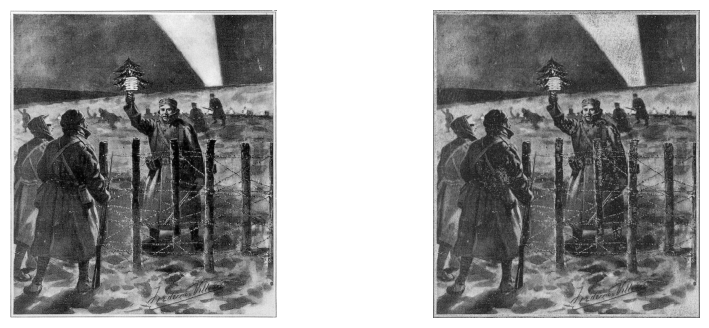

In [51]:
def local_filter(image, region):
    h, w = image.shape
    restored = np.zeros((h, w), dtype=float)

    pixels = region.ravel()
    hist, bin_edges = np.histogram(pixels, bins=256, range=(0, 255), density=True)
    x = (bin_edges[:-1] + bin_edges[1:]) / 2
    mu = np.sum(x * hist)
    noise_variance = np.sum(((x - mu) ** 2) * hist)
    

    for i in range(1, h-1):
        for j in range(1, w-1):
            local_window = image[i-1:i+2, j-1:j+2]
            local_mean = np.mean(local_window)
            local_variance = np.var(local_window)
            new_pixel=image[i,j]-(noise_variance/local_variance)*(image[i,j]-local_mean)
            restored[i,j] = new_pixel
    restored = np.clip(restored, 0, 255).astype(np.uint8)
    return restored  


img = cv2.imread('Christmas_Truce_by_Frederic_Villiers.jpg', cv2.IMREAD_GRAYSCALE)
region = img[20:60, 20:60]

img_local = local_filter(img,region)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img, cmap='gray')
axes[0].axis('off')

axes[1].imshow(img_local, cmap='gray')
axes[1].axis('off')

(-0.5, 39.5, 39.5, -0.5)

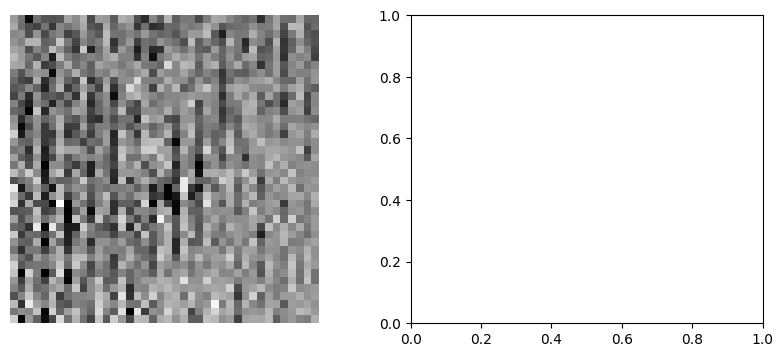

In [56]:
region = img[20:60, 20:60]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(region, cmap='gray')
axes[0].axis('off')